# <center> Assignment - 1</center>
---
* Total Marks: 20.
* Given on: Saturday, 7th Sept.
* Deadline to submit the assignment: Thursday, 12th Sept., 13:30 in the afternoon.
* You should submit the code and plots by email to me.
* Take the dataset available here: [Link](https://swmukher/web.cern.ch/swmukher/dataset_star.csv)
***

This is a multi-class classification problem for classifying stars. You are allowed to use only the following libararies: `Numpy`, `Matplotlib`, `Pandas`, `TensorFlow`, `Keras` and `Scikit-Learn`. Do not use any AI chatbots (e.g.: ChatGPT, Meta etc.) to solve this problem. Other than that, feel free to consult the resources available on the Internet. Discussions among students about this assignment are acceptable. But, do not copy from your classmate. If two codes look uncannily similar to me, points will be deducted from both.

In the dataset, you will find a few hundred stars with 6 types (0 to 5). The output classes carry the following meaning:
* Red Dwarf     :   0
* Brown Dwarf   :   1
* White Dwarf   :   2
* Main Sequence :   3
* Super Giants  :   4
* Hyper Giants  :   5

In the dataset, you will find some features, like:
* **Temperature** : Average temperature measured in kelvins.
* **L** : Relative luminosity of the star with respect to the sun.
* **R** : Relative radius of the star with respect to the sun.
* **A_M**: Absolute magnitude of the star.
* **Color**: (this is a non-numerical feature)
* **Spectral_Class**: (this is a non-numerical feature)

If the exact meaning of these features are not entirely clear to you, even then you should be able to proceed by assuming that each of these features are good discriminating variables and thus it is meaningful to use them as input variables for a classification problem. But feel free to read about the features from books or online resorces to get better intuition. 

* There should be code corresponding to every answer. An answer without code will not be accepted.
* The code should have clear explanations of what is done and why.
* The answers may be written inside the code (Python notebook) as commented-out lines. Clearly indicate which question is being answered.
***
## <center> Questions</center>
***

**1.** How many training examples are available in the dataset? \[**1 Point**\]

In [1]:
url = 'https://swmukher/web.cern.ch/swmukher/dataset_star.csv' # Specifying the locataion of the data file
import pandas as pd        # Importing the necessary library
dataset = pd.read_csv(url) # Reading the comma separated value (csv) file

In [3]:
dataset.info() #This reveals the number of training examples in the dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Temperature     240 non-null    int64  
 1   L               240 non-null    float64
 2   R               240 non-null    float64
 3   A_M             240 non-null    float64
 4   Color           240 non-null    object 
 5   Spectral_Class  240 non-null    object 
 6   Type            240 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 13.3+ KB


In [5]:
dataset.head() # Just some sanity check

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3068,0.002400,0.1700,16.12,Red,M,0
1,3042,0.000500,0.1542,16.60,Red,M,0
2,2600,0.000300,0.1020,18.70,Red,M,0
3,2800,0.000200,0.1600,16.65,Red,M,0
4,1939,0.000138,0.1030,20.06,Red,M,0


**Ans:** There are 240 training examples in the dataset.
***
***

**2.** Draw a 1D histrogram of temperature for all stars. \[**1 Point**\]

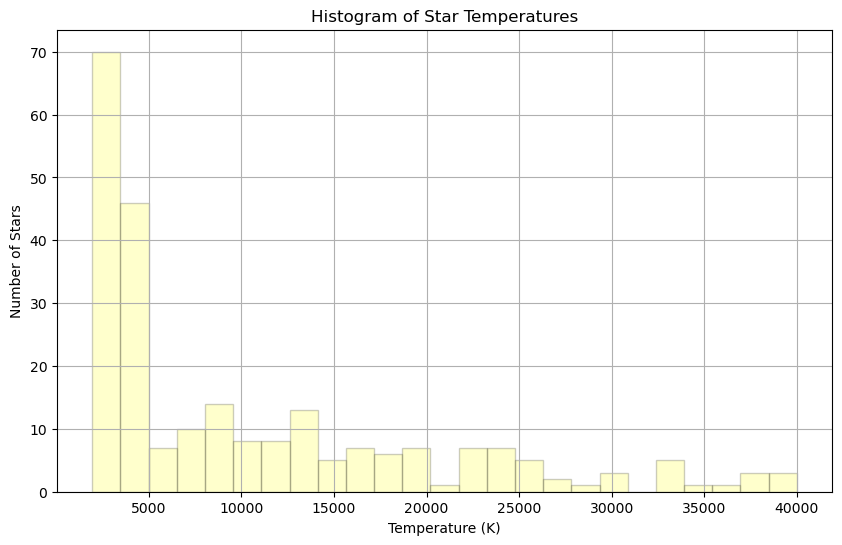

In [7]:
import matplotlib.pyplot as plt

# Plotting a 1D histogram for temperature
plt.figure(figsize=(10, 6))
plt.hist(dataset['Temperature'], bins=25, color='yellow', alpha=0.2, edgecolor='black')
plt.title('Histogram of Star Temperatures')
plt.xlabel('Temperature (K)')
plt.ylabel('Number of Stars')
plt.grid(True)
plt.show()


**Ans:** The above figure shows the histogram of temperature for all stars.
***
***

**3.** Draw 1D histograms of temperature for type-0 stars (in one color) and type-5 stars (in another color) on the same canvas. Note that these two histograms should be overlayed (i.e., plotted on the same canvas) in a way that the data in all bins are visible for both star types. \[**1 Point**\]

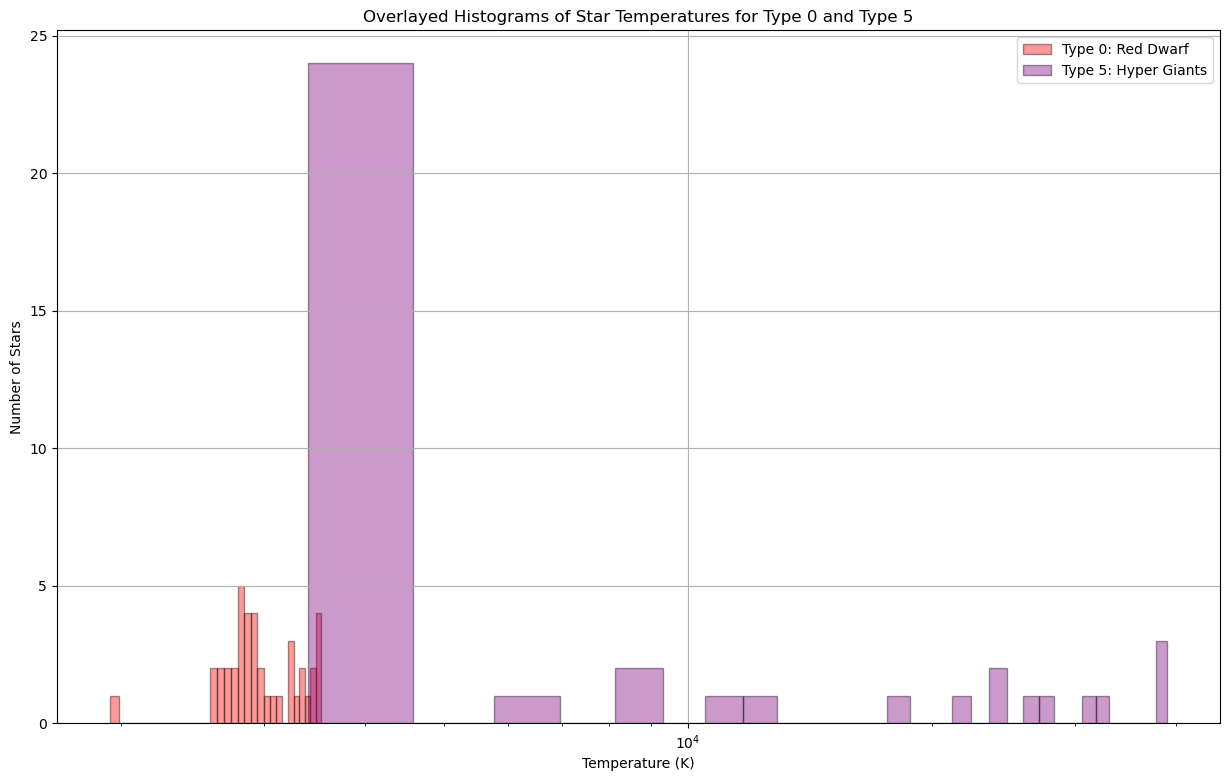

In [9]:
# Filter the dataset for type-0 and type-5 stars
type_0_stars = dataset[dataset['Type'] == 0]
type_5_stars = dataset[dataset['Type'] == 5]

# Plot the histograms with adjusted transparency
plt.figure(figsize=(15, 9))

# Histogram for type-0 stars (Red Dwarfs)
plt.hist(type_0_stars['Temperature'], bins=30, color='red', alpha=0.4, edgecolor='black', label='Type 0: Red Dwarf')

# Histogram for type-5 stars (Hyper Giants)
plt.hist(type_5_stars['Temperature'], bins=30, color='purple', alpha=0.4, edgecolor='black', label='Type 5: Hyper Giants')

# Choosing log scale for x-axis (temperatures) for better visibility of bins for type-0 stars
plt.xscale('log')
# Adding titles and labels
plt.title('Overlayed Histograms of Star Temperatures for Type 0 and Type 5')
plt.xlabel('Temperature (K)')
plt.ylabel('Number of Stars')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()


**Ans:** The above figure shows the overlayed histograms of temperature for type-0 (red) and type-5 stars (purple), with the temperatures (on _x_-axis) in log scale.
***

**4.** Draw a 2D scatter plot of temperature (along _x_-axis) vs _R_ (along _y_-axis) for all stars. \[**1 Point**\]

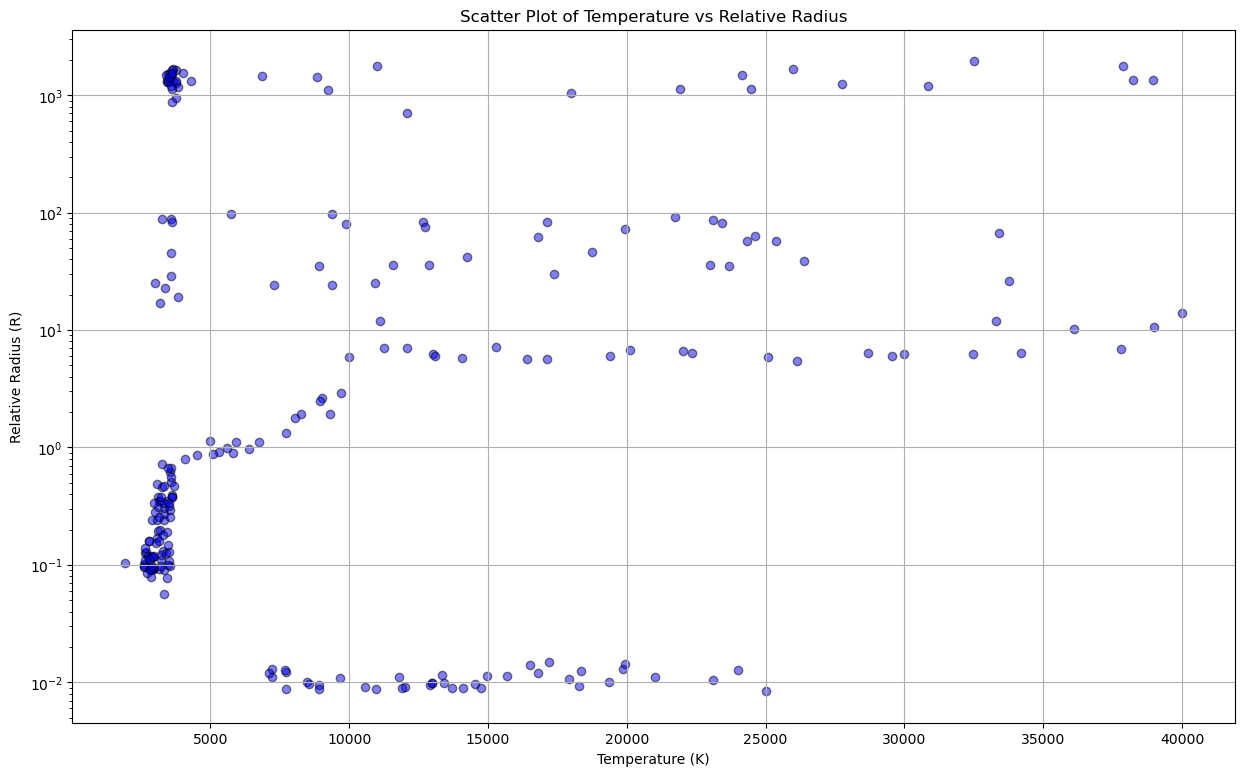

In [11]:
# Creating a scatter plot
plt.figure(figsize=(15, 9))
plt.scatter(dataset['Temperature'], dataset['R'], c='blue', edgecolor='black', alpha=0.5)

# Making scale on y-axis in log for better readability
plt.yscale('log')

# Adding titles and labels
plt.title('Scatter Plot of Temperature vs Relative Radius')
plt.xlabel('Temperature (K)')
plt.ylabel('Relative Radius (R)')
plt.grid(True)

# Show the plot
plt.show()


**Ans:** The above figure shows the scatter plot of temperature (in kelvins) of all stars vs the relative radius (_R_) on the _y_-axis in the log scale for better readability.
***

**5.** Draw 2D scatter plots of temperature (along _x_-axis) vs _R_ (along _y_-axis) for each type of stars on the same canvas. Note that these 6 scatter plots (one for each star type) should be overlayed (i.e., plotted on the same canvas). Scatter plots of each star type should be plotted with different colors, and a color label should be present in the plot to know which color corresponds to which star type. \[**Hint:** Do you need to make scale of _y_-axis in `log` to make the plot readable?\] \[**2 Points**\]

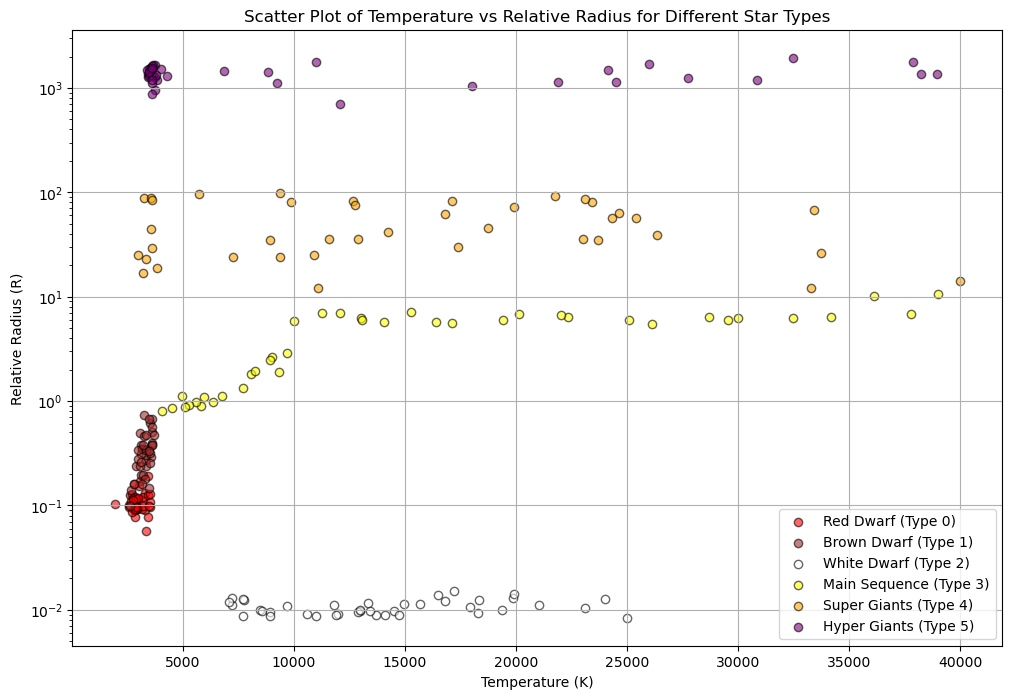

In [13]:
# Creating a figure canvas
plt.figure(figsize=(12, 8))

# Defining colors for each star type
colors = ['red', 'brown', 'white', 'yellow', 'orange', 'purple']
labels = ['Red Dwarf (Type 0)', 'Brown Dwarf (Type 1)', 'White Dwarf (Type 2)', 
          'Main Sequence (Type 3)', 'Super Giants (Type 4)', 'Hyper Giants (Type 5)']

# Plotting scatter plots for each star type on the same canvas using a 'for' loop
for star_type in range(6):
    subset = dataset[dataset['Type'] == star_type]
    plt.scatter(subset['Temperature'], subset['R'], color=colors[star_type], label=labels[star_type], alpha=0.6, edgecolor='black')

# Making y-scale logarithmic for better readability
plt.yscale('log')

# Adding labels and title
plt.xlabel('Temperature (K)')
plt.ylabel('Relative Radius (R)')
plt.title('Scatter Plot of Temperature vs Relative Radius for Different Star Types')

# Adding legend
plt.legend()

# Adding grid
plt.grid(True)

# Showing the plot
plt.show()


**Ans:** The above figure shows the scatter plot of temperature (in kelvins) for different star types vs the relative radius (_R_) on the _y_-axis in the log scale for better readability.
***

**6.** There are two non-numerical features. Transform them to numerical. Do any other preprocessing(s) that you think is necessary for this multi-class classification problem. \[**2 Points**\]

**Ans:** The two non-numerical features in the dataset are `Color` and `Spectral_Class`. We can convert these categorical features to numerical using one-hot encoding.

In [15]:
# Let us first see what set of colors do the stars have in this dataset:
unique_colors = dataset['Color'].unique()
print(unique_colors)


['Red' 'Blue White' 'White' 'Yellowish White' 'Blue white'
 'Pale yellow orange' 'Blue' 'Blue-white' 'Whitish' 'yellow-white'
 'Orange' 'White-Yellow' 'white' 'yellowish' 'Yellowish' 'Orange-Red'
 'Blue-White']


In [17]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Label Encoding for non-numerical features
label_encoder_color = LabelEncoder()
label_encoder_spectral = LabelEncoder()

dataset['Color'] = label_encoder_color.fit_transform(dataset['Color'])
dataset['Spectral_Class'] = label_encoder_spectral.fit_transform(dataset['Spectral_Class'])

# Feature Scaling for numerical features
# Selecting features that need scaling (excluding 'Type' which is the target)
features_to_scale = ['Temperature', 'L', 'R', 'A_M']

# Initializing the scaler
scaler = StandardScaler()

# Applying scaling
dataset[features_to_scale] = scaler.fit_transform(dataset[features_to_scale])

# Display the first few rows of the preprocessed dataset
print(dataset.head())


   Temperature         L         R       A_M  Color  Spectral_Class  Type
0    -0.779382 -0.598624 -0.459210  1.116745      8               5     0
1    -0.782110 -0.598624 -0.459241  1.162414      8               5     0
2    -0.828477 -0.598624 -0.459342  1.362213      8               5     0
3    -0.807496 -0.598624 -0.459229  1.167171      8               5     0
4    -0.897819 -0.598624 -0.459340  1.491607      8               5     0


***

**7.** Use about 80% data for training and the rest of the data for testing. \[**1 Point**\]

In [19]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
features=dataset.columns[:-1]
dataset[features]=StandardScaler().fit_transform(dataset[features])

# Defining the features and target variable
X = dataset.drop('Type', axis=1)  # Features (dropped the 'Type' column)
y = dataset['Type']               # Target variable
if len(y.shape)==1:
    y=to_categorical(y,num_classes=6)
# Split the data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# X_train and X_test are now ready for training a machine learning model
print("Training set shape", X_train.shape)
print("Testing set shape", X_test.shape)


Training set shape (192, 6)
Testing set shape (48, 6)


`random_state=42` is used to ensure that the split is reproducible.

`stratify=y` ensures that the proportion of each class is approximately the same in both the training and testing sets.

***

**8.** Write a fully connected neural network using `keras`. The neural network should have at least one hidden layer. Use your own judgement about hyperparameters. \[**2 Points**\]

In [21]:
from keras.models import Sequential
from keras.layers import Dense

# Define the model
model = Sequential()

# Input layer and first hidden layer
model.add(Dense(units=64, input_dim=X_train.shape[1], activation='relu'))

# Output layer (since it's a multi-class classification problem with 6 classes)
model.add(Dense(units=6, activation='softmax'))


C:\Users\Anant\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**9.** How many parameters (_w_ and _b_) in total do you have in your model? \[**1 Point**\]

In [23]:
# Assuming X_train.shape[1] is the number of input features
input_dim = X_train.shape[1]

# Parameters from Input Layer to Hidden Layer
params_hidden = input_dim * 64 + 64

# Parameters from Hidden Layer to Output Layer
params_output = 64 * 6 + 6

# Total Parameters
total_params = params_hidden + params_output

total_params


838

**Ans:** Total number of parameters in this model = 838

**10.** As this is a multi-class classification, use activation = `softmax` in the output layer of the neural network. Also, use `loss = categorical_crossentropy` as the loss for this problem. Perform the training process. \[**2 Points**\]

In [25]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam

# Compiling the model
model.compile(optimizer='adam', loss='categorical_crossentropy',  metrics=['accuracy'])

# Saving the model for future use
model.save('star_classification_model.keras')

#Printing the model summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 838 (3.27 KB)

 Trainable params: 838 (3.27 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
# Training the model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2)


Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.2262 - loss: 1.8308 - val_accuracy: 0.4359 - val_loss: 1.6618
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4039 - loss: 1.6976 - val_accuracy: 0.5385 - val_loss: 1.5339
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6113 - loss: 1.4933 - val_accuracy: 0.5897 - val_loss: 1.4124
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6227 - loss: 1.4002 - val_accuracy: 0.5897 - val_loss: 1.3138
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6175 - loss: 1.2739 - val_accuracy: 0.6410 - val_loss: 1.2217
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6770 - loss: 1.1675 - val_accuracy: 0.6410 - val_loss: 1.1413
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7048 - loss: 1.0458 - val_accuracy: 0.6667 - val_loss: 1.0665
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6530 - loss: 1.0254 - val_accuracy: 0.6410 - val_loss

**11.** Predict on test data. \[**1 Point**\]

In [29]:
# Predicting on the test data
y_pred_probabilities = model.predict(X_test)

# Converting the probabilities to class labels by choosing the class of max probability
y_pred = y_pred_probabilities.argmax(axis=1)

# Showing the predicted classes
print("Predicted classes for the test data:")
print(y_pred)

# Comparing the predictions with the true labels
print("\nTrue labels for the test data:")
print(y_test.argmax(axis=1))


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Predicted classes for the test data:
[4 2 4 5 0 1 2 5 0 1 0 4 3 3 5 3 3 4 2 0 5 5 3 2 0 0 0 3 1 2 3 4 0 2 4 0 0
 1 0 2 4 5 2 3 5 0 4 5]

True labels for the test data:
[4 2 4 5 1 1 2 5 1 1 0 4 3 3 5 3 3 4 2 0 5 5 3 2 0 0 1 3 1 2 3 4 0 2 4 0 0
 1 0 2 4 5 2 3 5 1 4 5]


**12.** Plot the confusion matrix, based on test data, for multi-class classification. \[**2 Points**\]

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


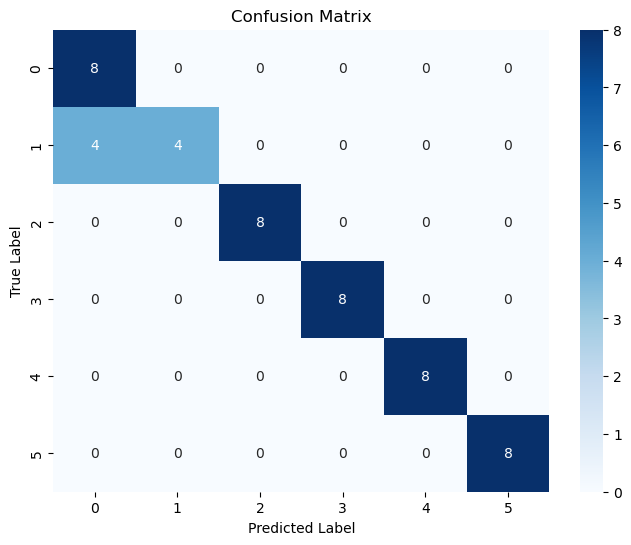

In [31]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predicting on the test data
y_pred = model.predict(X_test).argmax(axis=1)
y_true = y_test.argmax(axis=1)
# Computing the confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plotting the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(6), yticklabels=range(6))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


**13.** What is the overall accuracy of your model? \[**1 Point**\]

In [33]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy:{accuracy* 100:.2f}%")


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9132 - loss: 0.2267 
Test Accuracy:91.67%


**14.** Plot `loss` vs `epoch`. \[**1 Point**\]

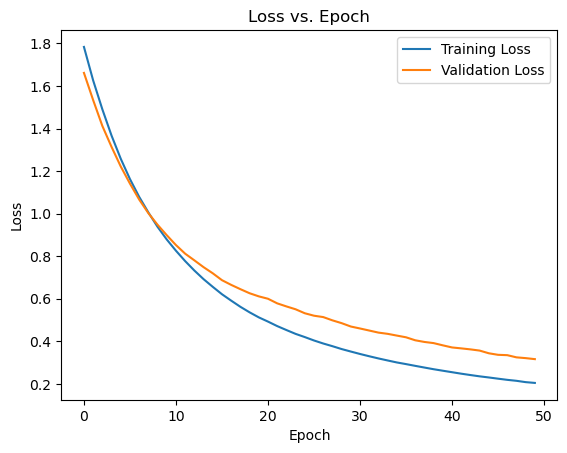

In [35]:
# Plotting loss vs. epoch
plt.plot(history.history['loss'], label='Training Loss') # Loss during training
plt.plot(history.history['val_loss'], label='Validation Loss') # Loss during validation
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs. Epoch')
plt.legend()
plt.show()


**15.** Plot `recall` vs `epoch`. \[**1 Point**\]

In [37]:
from tensorflow.keras.metrics import Recall


**Name:** Anant Badal

**Roll No.:** 221269

**Program:** Msc-PhD Dual Degree (Y22)